In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import seaborn as sns
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('NLP_Dataset1.csv')

In [3]:
len(data)

34813823

In [4]:
# Count the number of unique organization IDs for each organization country
org_country_summary = data.groupby('organizationcountrycode')['organizationid'].nunique().reset_index()

# Rename columns for clarity
org_country_summary.columns = ['OrganizationCountryCode', 'NumberOfOrganizations']

# Display the summary table
print(org_country_summary)

   OrganizationCountryCode  NumberOfOrganizations
0                       AE                     13
1                       AR                     29
2                       AT                      7
3                       AU                    139
4                       BA                      1
..                     ...                    ...
93                      US                   1100
94                      VI                      1
95                      VN                      9
96                      ZA                     13
97                      ZW                      1

[98 rows x 2 columns]


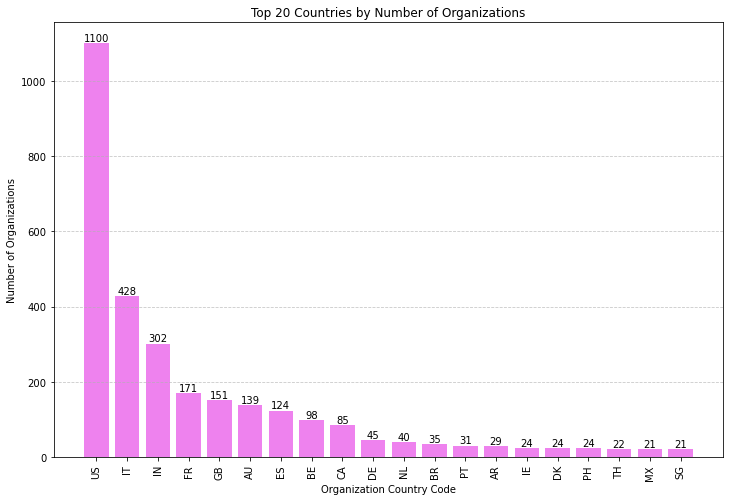

In [5]:
# Sort the DataFrame by NumberOfOrganizations in descending order
org_country_summary = org_country_summary.sort_values(by='NumberOfOrganizations', ascending=False)
org_country_data = pd.DataFrame(org_country_summary)
# Select top 20 countries
top_20_org_country = org_country_data.head(20)

# Plotting the bar plot with numbers on each bar
plt.figure(figsize=(12, 8))
bars = plt.bar(top_20_org_country['OrganizationCountryCode'], top_20_org_country['NumberOfOrganizations'], color='violet')

# Add numbers on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Organization Country Code')
plt.ylabel('Number of Organizations')
plt.title('Top 20 Countries by Number of Organizations')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [6]:
data.columns

Index(['AssetId', 'organizationid', 'organizationcountrycode', 'locationid',
       'AssetType', 'AlarmLabel', 'AlarmMessage', 'Severity',
       'ActivatedTimestamp', 'ClearedTimestamp', 'month', 'week',
       'ResolutionTimeMinutes', 'Lemmas_No_Stop_Words', 'Tokens'],
      dtype='object')

In [7]:
pip install ace_tools

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement ace_tools
ERROR: No matching distribution found for ace_tools
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Group the data by 'organizationcountrycode' and 'month' to analyze monthly data per country
monthly_grouped_data = data.groupby(['organizationcountrycode', 'month']).agg({
    'AssetId': 'count',  # Count the number of alarms
    'ResolutionTimeMinutes': 'mean'  # Calculate the average resolution time
}).reset_index()

# Rename the columns for better understanding
monthly_grouped_data.rename(columns={'AssetId': 'Number_of_Alarms', 'ResolutionTimeMinutes': 'Average_Resolution_Time'}, inplace=True)

# Group the data by 'organizationcountrycode' and 'week' to analyze weekly data per country
weekly_grouped_data = data.groupby(['organizationcountrycode', 'week']).agg({
    'AssetId': 'count',  # Count the number of alarms
    'ResolutionTimeMinutes': 'mean'  # Calculate the average resolution time
}).reset_index()

# Rename the columns for better understanding
weekly_grouped_data.rename(columns={'AssetId': 'Number_of_Alarms', 'ResolutionTimeMinutes': 'Average_Resolution_Time'}, inplace=True)


In [16]:
monthly_grouped_data = data.groupby(['organizationcountrycode', 'month']).agg(Number_of_Alarms=('AssetId', 'count'), Average_Resolution_Time=('ResolutionTimeMinutes', 'mean')).reset_index()

In [18]:
monthly_grouped_data.head(6)

,organizationcountrycode,month,Number_of_Alarms,Average_Resolution_Time
0,AE,1.0,2805,331.991735
1,AE,2.0,8365,178.292164
2,AE,3.0,14113,135.165110
3,AE,4.0,13500,113.543414
4,AE,5.0,20454,79.851882
5,AE,6.0,23113,88.830202


In [19]:
# Group the data by 'organizationcountrycode' to analyze overall data per country
country_grouped_data = data.groupby('organizationcountrycode').agg({
    'AssetId': 'count',  # Count the number of alarms
    'ResolutionTimeMinutes': 'mean'  # Calculate the average resolution time
}).reset_index()

# Rename the columns for better understanding
country_grouped_data.rename(columns={'AssetId': 'Number_of_Alarms', 'ResolutionTimeMinutes': 'Average_Resolution_Time'}, inplace=True)

# Display the first few rows of the country_grouped_data dataframe
print(country_grouped_data.head())

  organizationcountrycode  Number_of_Alarms  Average_Resolution_Time
0                      AE             82350               115.962294
1                      AR             93071               148.038103
2                      AT              5442              1321.852410
3                      AU            866764               157.365023
4                      BA               154               332.637338


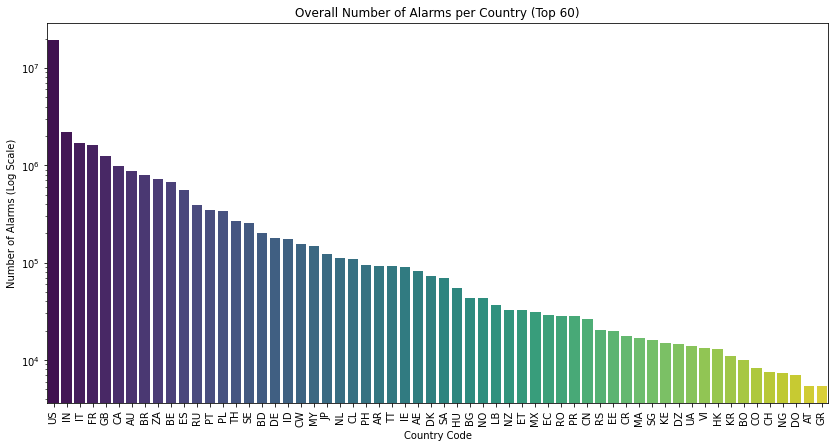

In [27]:
# Sort the dataframe by Number_of_Alarms in descending order and take the top 30 entries
top_30_countries = country_grouped_data.sort_values(by='Number_of_Alarms', ascending=False).head(60)

# Plotting the overall number of alarms for the top 30 countries using a logarithmic scale
plt.figure(figsize=(14, 7))
sns.barplot(data=top_30_countries, x='organizationcountrycode', y='Number_of_Alarms', palette='viridis')
plt.yscale('log')
plt.title('Overall Number of Alarms per Country (Top 60)')
plt.xlabel('Country Code')
plt.ylabel('Number of Alarms (Log Scale)')
plt.xticks(rotation=90)
plt.show()


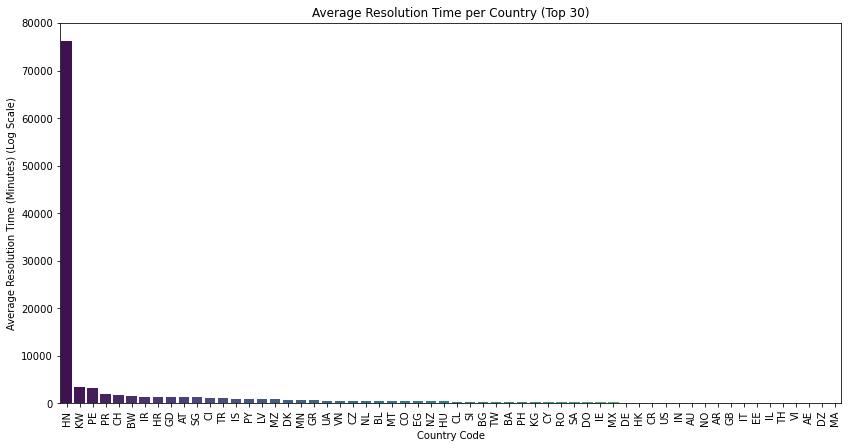

In [33]:
# Sort the dataframe by Number_of_Alarms in descending order and take the top 30 entries
top_30_countries = country_grouped_data.sort_values(by='Average_Resolution_Time', ascending=False).head(60)

# Plotting the average resolution time for the top 30 countries using a logarithmic scale
plt.figure(figsize=(14, 7))
sns.barplot(data=top_30_countries, x='organizationcountrycode', y='Average_Resolution_Time', palette='viridis')
#plt.yscale('log')
plt.title('Average Resolution Time per Country (Top 30)')
plt.xlabel('Country Code')
plt.ylabel('Average Resolution Time (Minutes) (Log Scale)')
plt.xticks(rotation=90)
plt.show()

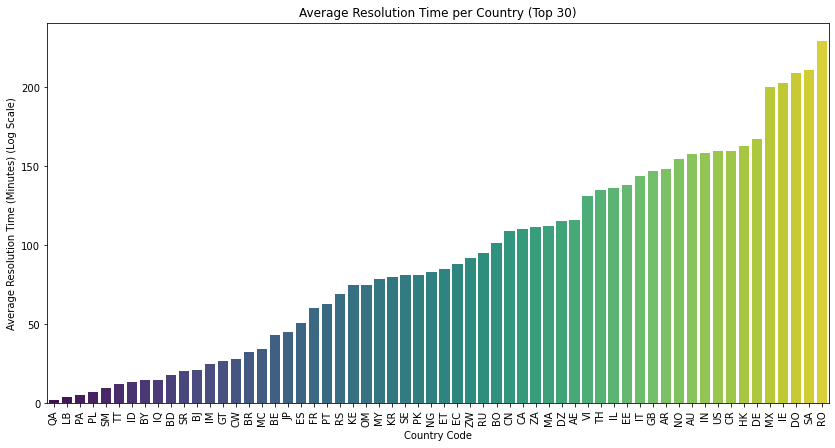

In [32]:
# Sort the dataframe by Number_of_Alarms in descending order and take the top 30 entries
top_30_countries = country_grouped_data.sort_values(by='Average_Resolution_Time', ascending=True).head(60)

# Plotting the average resolution time for the top 30 countries using a logarithmic scale
plt.figure(figsize=(14, 7))
sns.barplot(data=top_30_countries, x='organizationcountrycode', y='Average_Resolution_Time', palette='viridis')
#plt.yscale('log')
plt.title('Average Resolution Time per Country (Top 30)')
plt.xlabel('Country Code')
plt.ylabel('Average Resolution Time (Minutes) (Log Scale)')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Filter the data for the country code 'HN'
hn_data = data[data['organizationcountrycode'] == 'HN']

# Group the data by 'month' to analyze monthly data for 'HN'
hn_monthly_grouped_data = hn_data.groupby('month').agg({
    'AssetId': 'count',  # Count the number of alarms
    'ResolutionTimeMinutes': 'mean'  # Calculate the average resolution time
}).reset_index()

# Rename the columns for better understanding
hn_monthly_grouped_data.rename(columns={'AssetId': 'Number_of_Alarms', 'ResolutionTimeMinutes': 'Average_Resolution_Time'}, inplace=True)

# Group the data by 'week' to analyze weekly data for 'HN'
hn_weekly_grouped_data = hn_data.groupby('week').agg({
    'AssetId': 'count',  # Count the number of alarms
    'ResolutionTimeMinutes': 'mean'  # Calculate the average resolution time
}).reset_index()

# Rename the columns for better understanding
hn_weekly_grouped_data.rename(columns={'AssetId': 'Number_of_Alarms', 'ResolutionTimeMinutes': 'Average_Resolution_Time'}, inplace=True)

hn_weekly_grouped_data
hn_monthly_grouped_data

,month,Number_of_Alarms,Average_Resolution_Time
0,1.0,6,101790.236111
1,3.0,1,3.633333
2,5.0,6,63406.075000


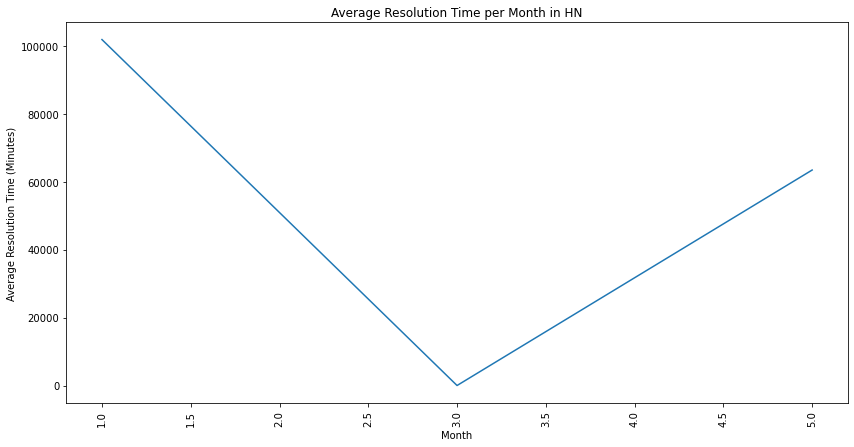

In [38]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=hn_monthly_grouped_data, x='month', y='Average_Resolution_Time')
plt.title('Average Resolution Time per Month in HN')
plt.xlabel('Month')
plt.ylabel('Average Resolution Time (Minutes)')
plt.xticks(rotation=90)
plt.show()

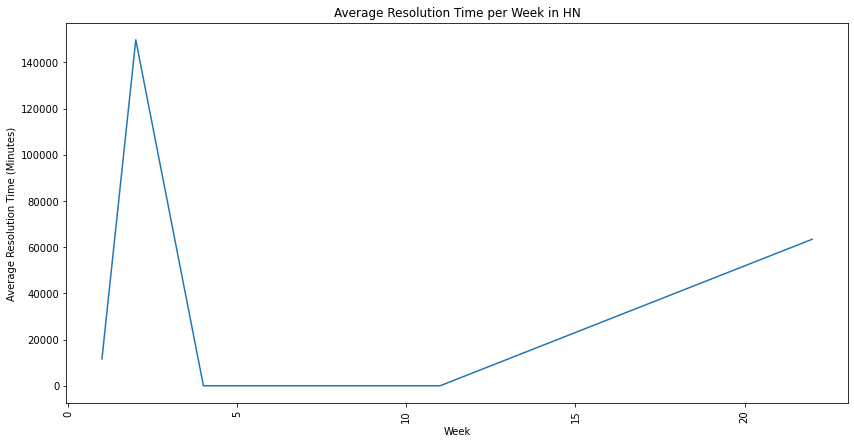

In [39]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=hn_weekly_grouped_data, x='week', y='Average_Resolution_Time')
plt.title('Average Resolution Time per Week in HN')
plt.xlabel('Week')
plt.ylabel('Average Resolution Time (Minutes)')
plt.xticks(rotation=90)
plt.show()

In [58]:
# Filter the data for the country code 'US'
us_data = data[data['organizationcountrycode'] == 'US']


us_monthly_grouped_data = us_data.groupby('month').agg({
    'AssetId': 'count',  # Count the number of alarms
    'ResolutionTimeMinutes': 'mean'  # Calculate the average resolution time
}).reset_index()

# Rename the columns for better understanding
us_monthly_grouped_data.rename(columns={'AssetId': 'Number_of_Alarms', 'ResolutionTimeMinutes': 'Average_Resolution_Time'}, inplace=True)

# Group the data by 'week' to analyze weekly data for 'US'
us_weekly_grouped_data = us_data.groupby('week').agg({
    'AssetId': 'count',  # Count the number of alarms
    'ResolutionTimeMinutes': 'mean'  # Calculate the average resolution time
}).reset_index()

# Rename the columns for better understanding
us_weekly_grouped_data.rename(columns={'AssetId': 'Number_of_Alarms', 'ResolutionTimeMinutes': 'Average_Resolution_Time'}, inplace=True)

us_weekly_grouped_data
us_monthly_grouped_data

,month,Number_of_Alarms,Average_Resolution_Time
0,1.0,2798626,133.241267
1,2.0,2709352,214.370186
2,3.0,3346636,118.826143
3,4.0,3243346,123.258923
4,5.0,3519784,219.619100
5,6.0,3778508,150.751686


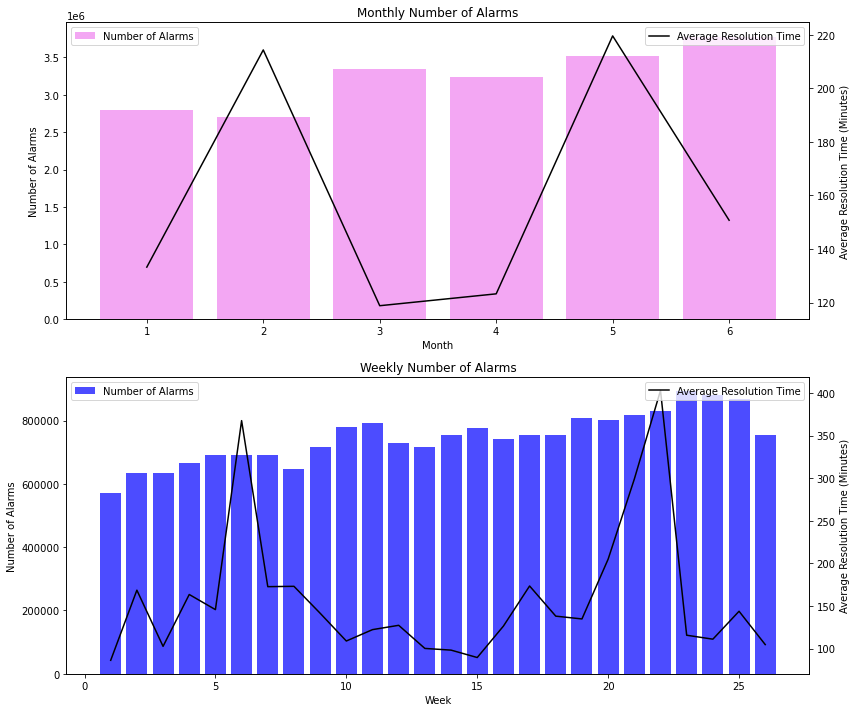

In [66]:
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Monthly Data Plot
axes[0].bar(us_monthly_grouped_data['month'], us_monthly_grouped_data['Number_of_Alarms'], color='violet', alpha=0.7, label='Number of Alarms')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Alarms')
axes[0].set_title('Monthly Number of Alarms')
axes[0].legend(loc='upper left')

ax2 = axes[0].twinx()
ax2.plot(us_monthly_grouped_data['month'], us_monthly_grouped_data['Average_Resolution_Time'], color='black', label='Average Resolution Time')
ax2.set_ylabel('Average Resolution Time (Minutes)')
ax2.legend(loc='upper right')

# Weekly Data Plot
axes[1].bar(us_weekly_grouped_data['week'], us_weekly_grouped_data['Number_of_Alarms'], color='blue', alpha=0.7, label='Number of Alarms')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Number of Alarms')
axes[1].set_title('Weekly Number of Alarms')
axes[1].legend(loc='upper left')

ax2 = axes[1].twinx()
ax2.plot(us_weekly_grouped_data['week'], us_weekly_grouped_data['Average_Resolution_Time'], color='black', label='Average Resolution Time')
ax2.set_ylabel('Average Resolution Time (Minutes)')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()